### **Insurance Price prediction Project**

##### The factors that infuance the insurance price 


In this project we'll go through the process of creating a machine learning algorightme to predict the price of the insurance based on the  customer profile. We'll use Python and the scikit-learn library to create a model that  can predict the price of the insurance based on the training data.

#### Context

* **age**: age of primary beneficiary

* **sex**: insurance contractor gender, female, male

* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children**: Number of children covered by health insurance / Number of dependents

* **smoker**: Smoking

* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

Import python library

In [1]:
import pandas as pd
#math
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

#regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
#metrics
from sklearn import metrics
#crossval
from sklearn.metrics import mean_squared_error

#dimension increasing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import  Pipeline

In [2]:
import warnings
warnings.filterwarnings("ignore")

The function below will calculate the $R^{2}$ on each feature given the a input model.

In [3]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Insurance fees)')
    plt.ylabel('Proportion of fees')

    plt.show()
    plt.close()

Load the dataset


In [4]:
#load dataset
insurance = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df = pd.DataFrame(insurance)


View the top 5 rows of the data

In [5]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.dtypes.value_counts()

object     3
int64      2
float64    2
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Number of missing value

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing data



Number of duplicates

In [9]:
df.duplicated().sum()

1

There's only one duplicated in the dataset. let's removed it

In [10]:
# dropping duplicate values
df.drop_duplicates(inplace=True)

# length after removing duplicates
length = len(df)
length

1337

Now after delete the duplited in the datafram, now the length of the dataframe is 1337 from 1338

### Descriptive


Descriptive  statistics are used to summarize and describe the main features of a dataset. They provide a way to understand the count, min, mean,std , max of the data.

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory data analysis (EDA)

Exploratory data analysis(EDA) is a crucial step in data science that involves summarizing and visualizing data to understand


<Axes: xlabel='charges'>

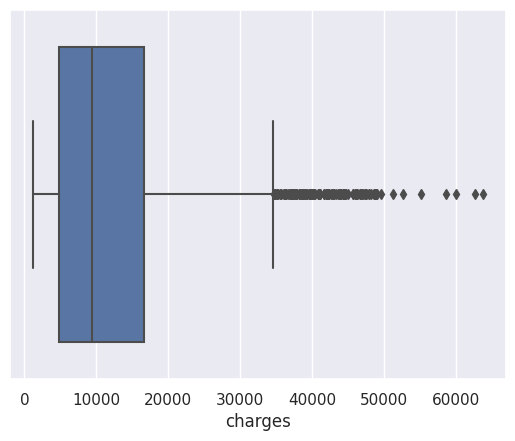

In [12]:
sns.boxplot(df, x='charges')

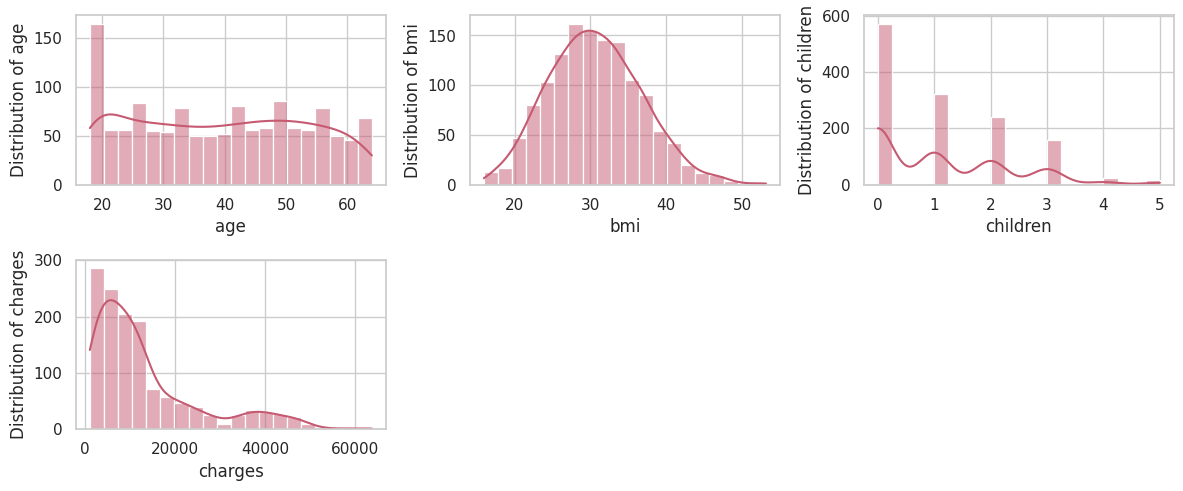

In [13]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Example to get numberic features

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

# Loop through numerical features
for i, column in enumerate(numerical_features, start=1):  # Use enumerate to get the index
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[column], bins=20, kde=True, color='#C55A71')
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()

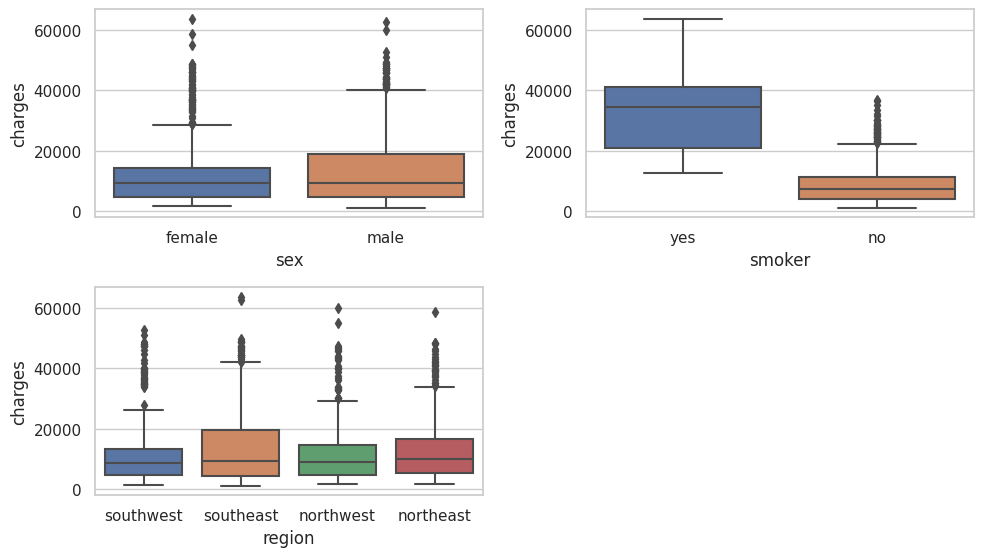

In [14]:
plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
sns.boxplot(x = 'sex', y = 'charges', palette="deep", data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'smoker', y = 'charges', palette="deep", data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'region', y = 'charges', palette="deep", data = df)

plt.tight_layout()
plt.show()

There is a presence of outlier 

In [15]:
# Group by 'sex', 'smoker', and 'region', and sum the 'charges'
grouped_df = df.groupby(['sex', 'smoker', 'region'])['charges'].mean().reset_index()

# Display the resulting DataFrame
grouped_df.style.background_gradient(axis=0)

#sns.catplot(grouped_df, x='region', y='charges', col='sex')

,sex,smoker,region,charges
0,female,no,northeast,9640.426984
1,female,no,northwest,8786.998679
2,female,no,southeast,8440.205552
3,female,no,southwest,8234.091260
4,female,yes,northeast,28032.046398
5,female,yes,northwest,29670.824946
6,female,yes,southeast,33034.820716
7,female,yes,southwest,31687.988430
8,male,no,northeast,8664.042222
9,male,no,northwest,8371.690284


 The result also showed that the customer with smoking habit pays more money than those  who do not smoke.

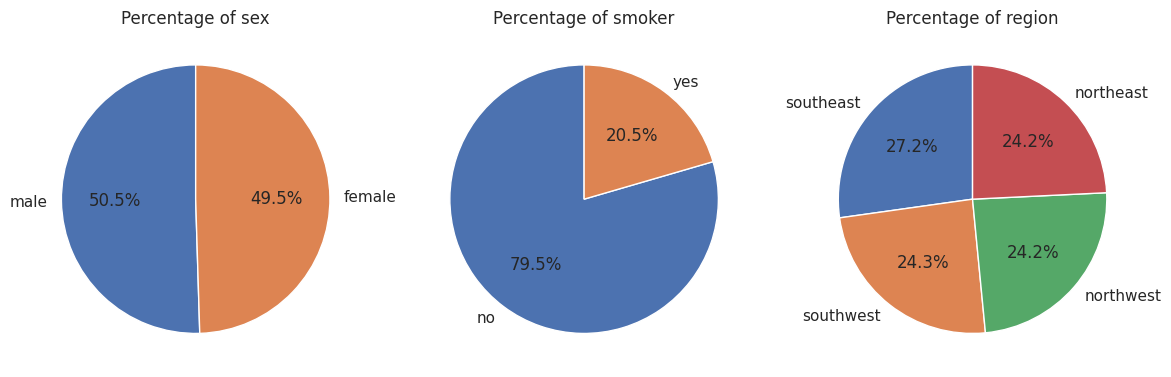

In [16]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()  # Example to get numberic features

plt.figure(figsize=(12, 12))  # Adjust figure size as needed

# Loop through categorical features
for i, c in enumerate(categorical_features, start=1):  # Use enumerate to get the index
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns as needed
    s = df[c].value_counts()  # Get value counts for the categorical feature
    plt.pie(s, labels=s.index, autopct='%1.1f%%', startangle=90)  # Create pie chart
    plt.title(f'Percentage of {c}')

plt.tight_layout()
plt.show()

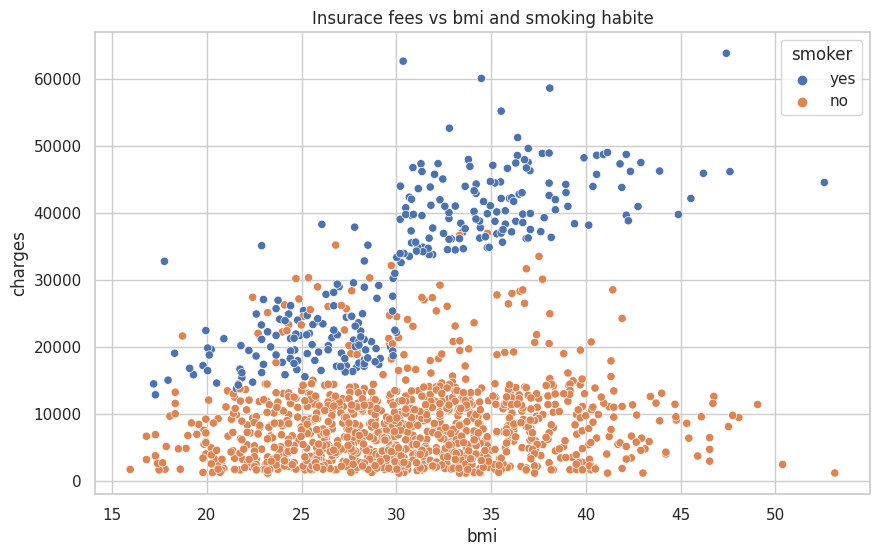

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Insurace fees vs bmi and smoking habite')
plt.show()

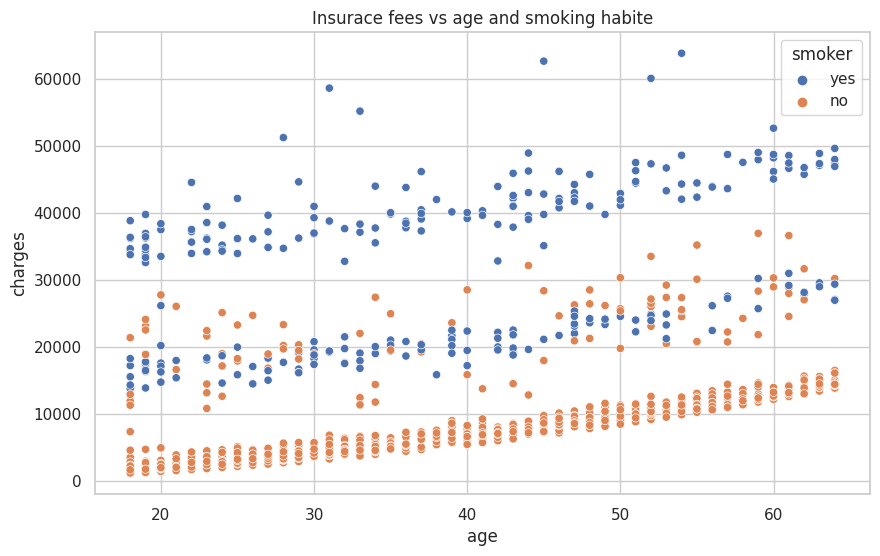

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Insurace fees vs age and smoking habite')
plt.show()

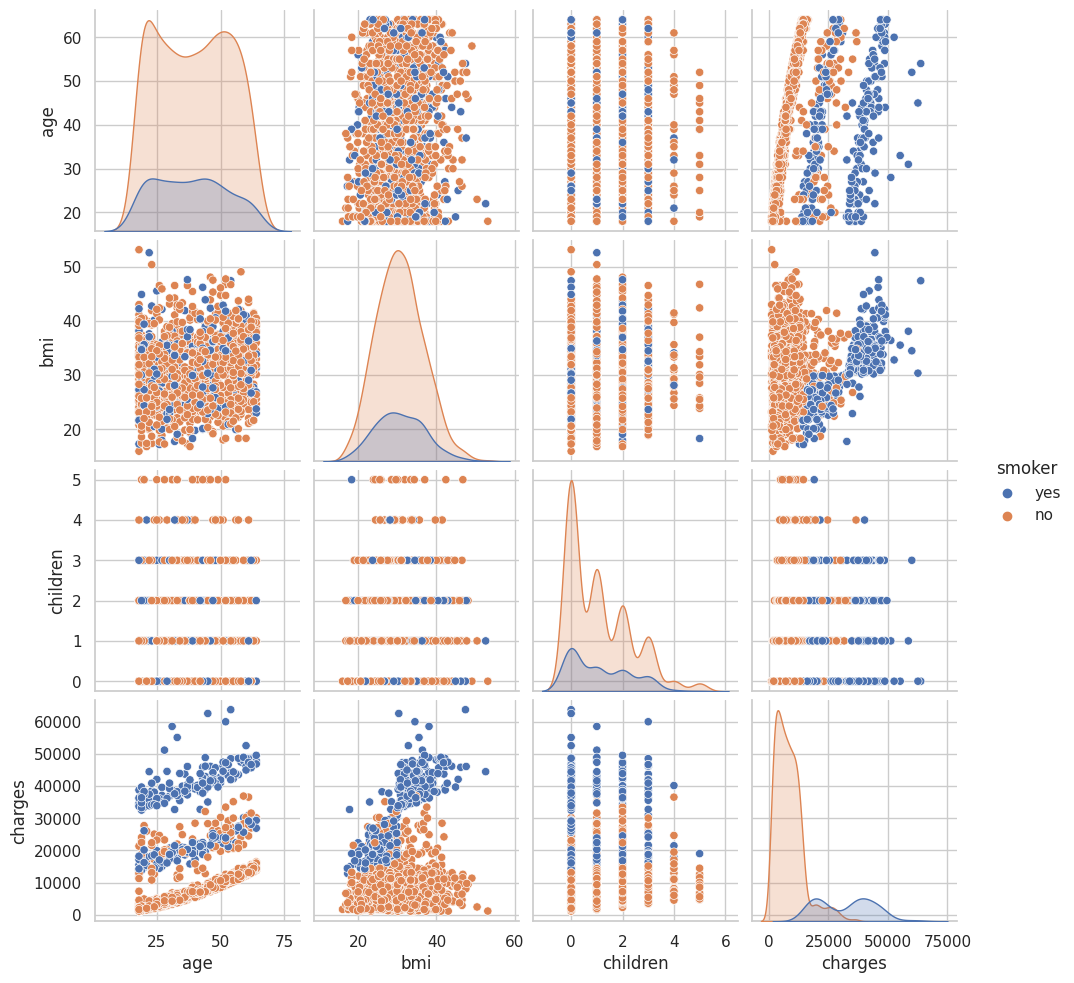

In [19]:
sns.pairplot(df, hue='smoker')
plt.show()

## Label Encoding

Labelencoding  is a technique used in machine learning to convert categorical variables into numerical variables. It is a way to  represent categorical data in a numerical format that can be used by machine learning algorithms.  Label encoding is a type of encoding where each unique category is assigned a unique integer value.  The most common method of label encoding is the use of the `LabelEncoder` class from the  `sklearn.preprocessing` module in Python.







In [20]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [21]:
#duplication check
corr_matrix = df.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

Nex we'll do correlation

<Axes: >

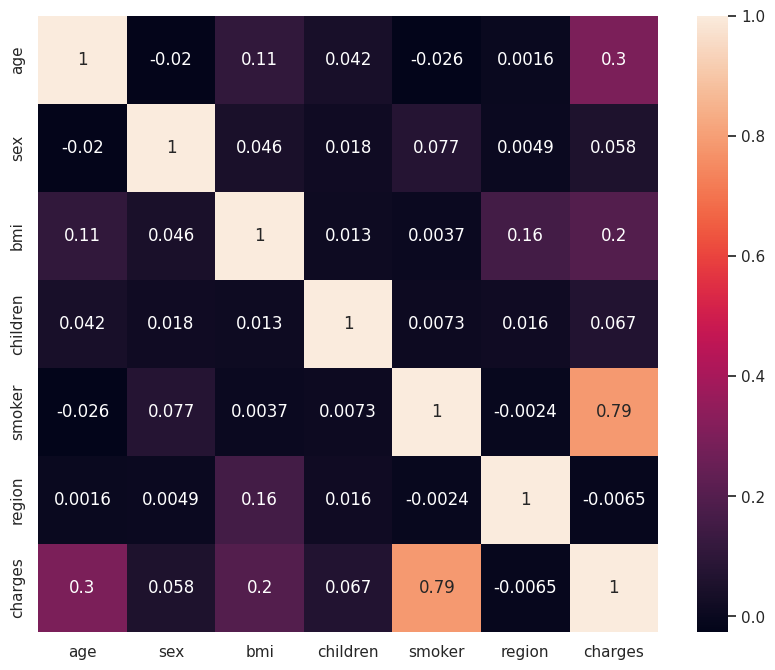

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)

**Notes** :
 Charges column and smoker are 79% corraleted , which is a strong positive correlation. This means that the probability of a person being a smoker will have a high charge than the person who do not smoke. The correlation coefficient is 0.79, which is close  to 1, indicating a strong positive linear relationship between the two variables.



## Remove the outliers in the following columns

In [23]:
outliers = ['age', 'bmi', 'children', 'charges']
#remove the oulier, from 0.01 to 0.99 parcent
for c in outliers:
    Q1=df[c].quantile(0.01)
    Q3=df[c].quantile(0.99)
    df=df[df[c]<=Q3]
    df=df[df[c]>=Q1]


### Split the data  into training and testing sets.




In [24]:
X = df.drop(['charges'], axis=1)
y = df.charges
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

## 1. LinearRegression Model

In [25]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)

LinearRegression()

In [26]:
linear_intercept = Lr.intercept_
linear_coef = Lr.coef_

Let's look at the feature important with liner_coef _ and intercept_.

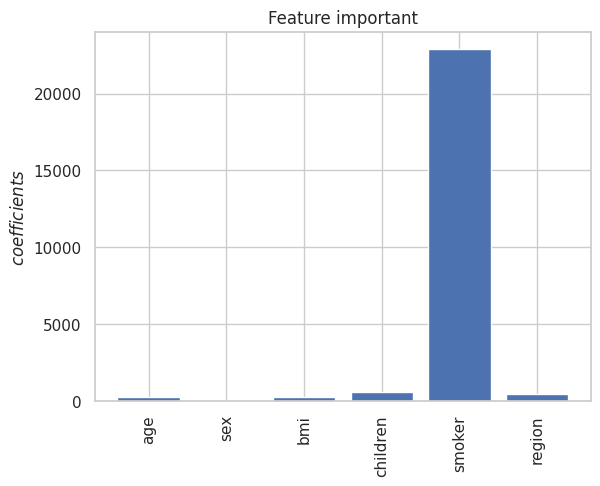

In [27]:
plt.bar(X.columns,abs(linear_coef))
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.title('Feature important')
plt.show()

## Predicting and evaluation

In [28]:
y_pred = Lr.predict(X_test)
#r2_score
linear_score = metrics.r2_score(y_test, y_pred)

def Evaluation(x_test, y_test, model) :
  y_pred = model.predict(x_test)
  mse = metrics.mean_absolute_error(y_test, y_pred)
  msqe = metrics.mean_squared_error(y_test, y_pred)
  r2_score = metrics.r2_score(y_test, y_pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

  print("mean_absolute_error : ", mse)
  print("mean_squared_error : ", msqe)
  print("root_mean_absolute_error : ", rmse)
  print("r2_score    : ", r2_score)



In [29]:
Evaluation(X_test, y_test, Lr)

mean_absolute_error :  4154.478307516781
mean_squared_error :  36288138.076324925
root_mean_absolute_error :  6023.963651643735
r2_score    :  0.7289653172331092


In [30]:
def compare(y_test, y_pred) :
  compare = pd.DataFrame()
  compare["Actual"] = y_test
  compare["Predict"] = y_pred

  return compare

In [31]:
compare(y_test, y_pred)

,Actual,Predict
933,7348.14200,9816.690955
676,12485.80090,16399.063680
522,9866.30485,12420.210346
212,3537.70300,4599.461430
1013,8765.24900,11202.879095
...,...,...
331,24393.62240,32982.688315
324,2866.09100,3222.091416
265,46151.12450,37339.491065
1279,4189.11310,4448.130107


Text(0, 0.5, 'y_pred')

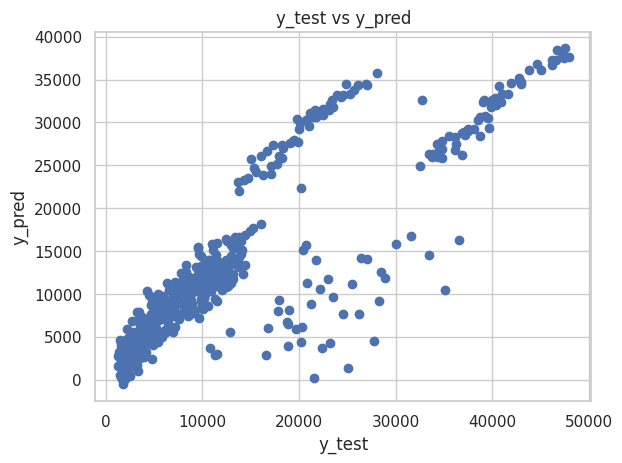

In [32]:
plt.scatter(y_test, y_pred)
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

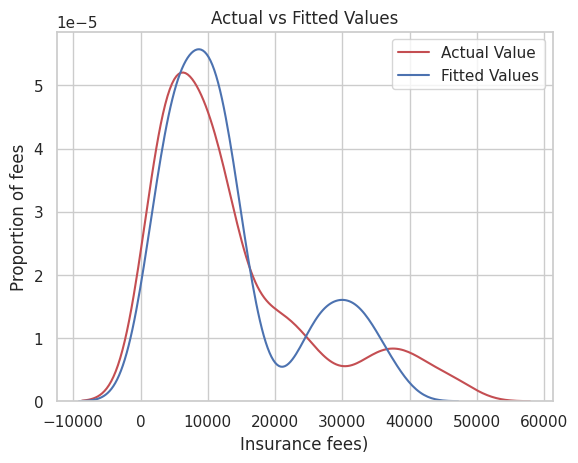

In [33]:
predicted=Lr.predict(X_test)
plot_dis(y_test,predicted)

## 2. Ridge regression
Ridge regression  is a type of linear regression that adds a penalty term to the loss function to prevent overfitting . The penalty term is proportional to the magnitude of the coefficients, which helps to reduce the impact of  noise in the data.


In [34]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(X_test, y_test))

-10659.515602312813
[  254.0974013    -98.38662433   298.83315052   631.40766461
 22773.8925713   -497.84875172]
0.7289788964963477


## 3. Lasso Regression

Lasso regression  is a type of linear regression that uses L1 regularization to reduce overfitting. It adds a  penalty term to the loss function that is proportional to the absolute value of the model coefficients. This penalty  term is known as the L1 norm or L1 regularization term.

In [35]:
from scipy.stats.mstats import normaltest
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(X_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(X_test, y_test))

-10682.158574919575
[  254.11176478  -101.31471178   299.00621032   631.08052033
 22865.64857342  -496.81223582]
0.728975822020137


## 3. Polynomial regression

Polynomial regression _ is a type of regression analysis in which the relationship between the independent variable(s) and the dependent  variable is modeled using a polynomial equation of a specified degree. The degree of the polynomial is determined by  the researcher based on the nature of the data and the research question. For example, a quadratic polynomial   regression would model the relationship between the independent variable and the dependent variable using a  quadratic equation ( e.g., y = ax^2 + bx + c). The coefficients of the polynomial equation are  estimated  using a method such as least squares regression. Polynomial regression can be used to model non-linear   relationships between variables and can be useful for identifying non-linear patterns in the data. However, it   can be  sensitive to outliers and may not be suitable for large datasets.  

In [36]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [37]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.8416842893575083
R^2 on testing data: 0.8258613665811123


## 4. Random forest regression

In [38]:
# Initialize the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)  # You can adjust n_estimators

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
pred_ = model.predict(X_train)

In [39]:
Evaluation(X_test,y_test, model)

mean_absolute_error :  2611.8317906704183
mean_squared_error :  23401032.818996005
root_mean_absolute_error :  4837.461402326225
r2_score    :  0.8252186019251249


In [40]:
Evaluation(X_train, y_train, model)


mean_absolute_error :  1001.6357472676779
mean_squared_error :  3487592.1056649103
root_mean_absolute_error :  1867.5095998856098
r2_score    :  0.9723491008697563


Compare

Text(0, 0.5, 'y_pred')

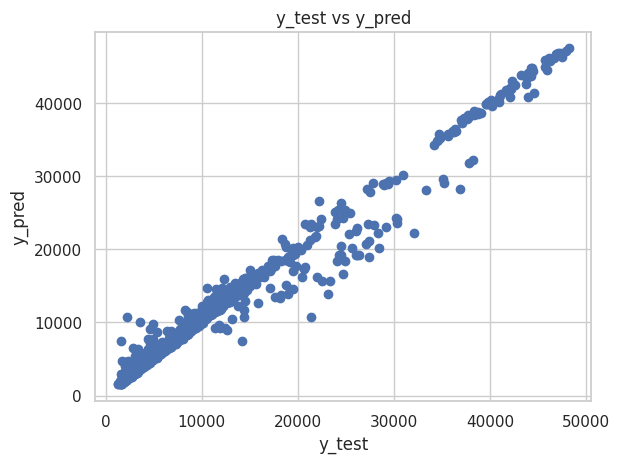

In [41]:
plt.scatter(y_train, pred_)
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

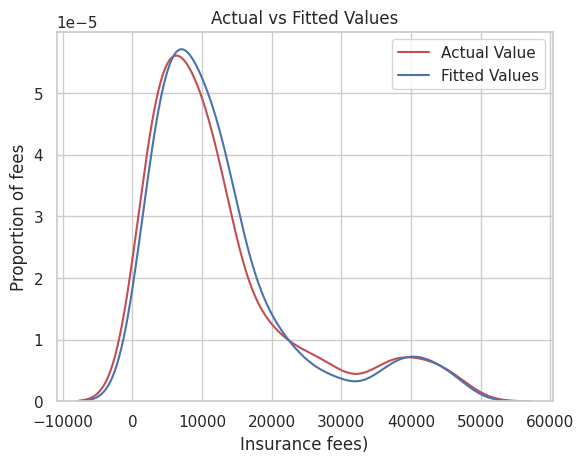

In [42]:
predicted=model.predict(X_train)
plot_dis(y_train,predicted)

Feature impotances

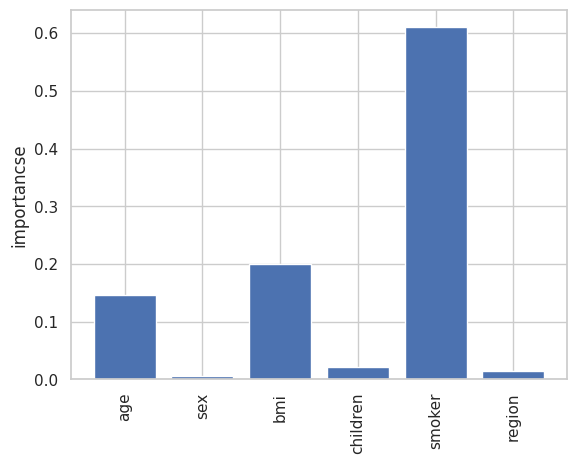

In [43]:
#feature imortance
features = model.feature_names_in_
importancse = model.feature_importances_

plt.bar(features,importancse)
plt.xticks(rotation=90)
plt.ylabel("importancse")
plt.show()

In [44]:
def compare(y_train, pred_) :
  compare = pd.DataFrame()
  compare["Actual"] = y_train
  compare["Predict"] = pred_
  compare["compare"] = abs(y_train - pred_)

  return compare

In [45]:
compare(y_train, pred_)

,Actual,Predict,compare
477,2534.39375,2594.728411,60.334661
149,1842.51900,2612.461468,769.942468
867,11576.13000,12796.342303,1220.212303
620,3659.34600,3844.516062,185.170062
555,3847.67400,4158.971112,311.297112
...,...,...,...
797,4719.52405,5931.446915,1211.922865
875,2690.11380,3774.059402,1083.945602
1270,3292.52985,4730.974188,1438.444338
587,43943.87610,40796.830962,3147.045138


### Xbooster Model

In [46]:
from xgboost import XGBRegressor

# Create and fit the model
objective='reg:squarederror'
learning_rate=0.1
n_estimators=100
random_state=42
max_depth=5

XGB = XGBRegressor(objective=objective,learning_rate=learning_rate, max_depth =max_depth, n_estimators=n_estimators,eval_metric='mlogloss')
XGB.fit(X_train, y_train)

# Make predictions
predictions = XGB.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)


In [47]:
print('Evaluation on training data:')
Evaluation(X_train, y_train, XGB)

print('Evaluation on testing data:')
Evaluation(X_test, y_test, XGB)

Evaluation on training data:
mean_absolute_error :  1325.6040670476482
mean_squared_error :  6362402.576144598
root_mean_absolute_error :  2522.3803393113812
r2_score    :  0.9495565574961534
Evaluation on testing data:
mean_absolute_error :  2652.2971939663285
mean_squared_error :  22913861.791113924
root_mean_absolute_error :  4786.842570120091
r2_score    :  0.8288572632617169


The model is doing well on the traing  data, but it's not doing well on the test data. This is a common problem in machine  learning, known as overfitting. The model is too complex and is fitting the noise in the  training data, rather than the underlying patterns. To fix this, we can try a few things:  1) reduce the number of features, 2) use regularization, 3) use a  different model.  Let's try reducing the number of features. We can use the SelectKBest  class from  sklearn.feature_selection to select the top k features.   

In [48]:
XGB.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mlogloss',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)>

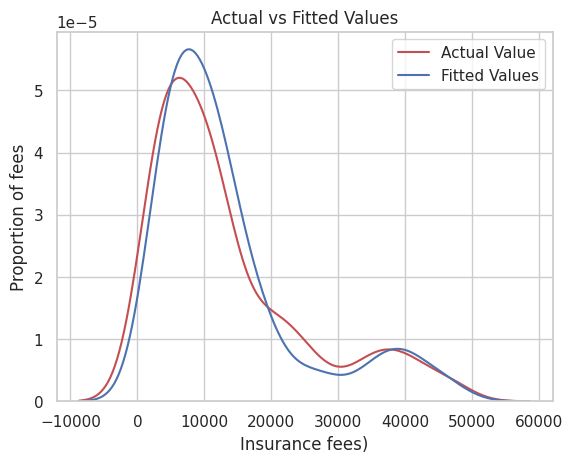

In [49]:
predicted=XGB.predict(X_test)
plot_dis(y_test,predicted)

In [50]:
XGB.learning_rate

0.1

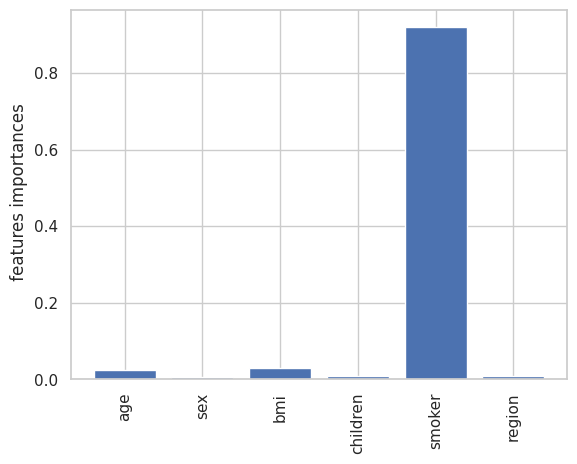

In [51]:
name = XGB.feature_names_in_
importances = XGB.feature_importances_

plt.bar(name,importances)
plt.xticks(rotation=90)
plt.ylabel(" features importances")
plt.show()

## Compare


In [52]:
def compare(y_test, predictions) :
  compare = pd.DataFrame()
  compare["Actual"] = y_test
  compare["Predict"] = predictions
  compare["compare"] = abs(y_test - predictions)
 
  return compare

#print the result
compare(y_test, predictions)

,Actual,Predict,compare
933,7348.14200,7916.680664,568.538664
676,12485.80090,13403.836914,918.036014
522,9866.30485,10940.876953,1074.572103
212,3537.70300,7032.801270,3495.098270
1013,8765.24900,9589.096680,823.847680
...,...,...,...
331,24393.62240,28611.144531,4217.522131
324,2866.09100,4681.365723,1815.274723
265,46151.12450,45474.222656,676.901844
1279,4189.11310,8388.200195,4199.087095


##### Predict a sample

In [53]:
X_test.iloc[165:166]

,age,sex,bmi,children,smoker,region
1283,18,1,30.03,1,0,2


In [54]:
# will rondomly select the array to test the our model buld 
input_data = X.iloc[165:166]

#change the input data into numpy array
input_data_asnumpy_array = np.asanyarray(input_data)

#reshape the numpy array are we are insert new value for prediction
input_data_reshaped = input_data_asnumpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('The predicted amount is',prediction)

The predicted amount is [15607.2687717]


### Conclusion

 Like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Redomn forest turned out to be the best model with the accuracy of  0.95% on traing data and 0.82% on testing data.  The model is able to predict the medical cost charges with a high degree of accuracy. The model can  be used to predict the medical cost charges for patients with similar characteristics. The model can also be used  to identify the factors that affect the medical cost charges and to develop strategies to reduce the medical cost charges

### Please upvote if you like the notebook